Potential theses:

What creates controversy between critics and users?
    Are critics biased against a specific genre? (Is there any genre where critic scores are consistently lower?)

Have reviews changed over time?

Genre composition changed over time?

PRESENCE/PERCENTAGE of genre has or not relationship with avg scores for genre?

THESIS: There was a genre shift in the 80s & 90s, and it changed the way people review and rate music


Do you really like the music you like?
    -Stacked line chart of genres over time (maybe aggregate in 5-year increments)
    -Chart showing critical review score turnaround in last few years
    -Quartile analysis of user reviews, to see if all reviews are going down or if more people are just bombing it



In [128]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn import preprocessing
from statsmodels.graphics.regressionplots import *

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

from scipy.stats import ttest_ind

sns.set_context('notebook')

In [2]:
total_set = pd.read_csv('../data/raw/album_ratings.csv')
total_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32358 entries, 0 to 32357
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Artist                   32358 non-null  object 
 1   Title                    32357 non-null  object 
 2   Release Month            31769 non-null  object 
 3   Release Day              31768 non-null  object 
 4   Release Year             32358 non-null  int64  
 5   Format                   32358 non-null  object 
 6   Label                    28902 non-null  object 
 7   Genre                    24398 non-null  object 
 8   Metacritic Critic Score  13884 non-null  float64
 9   Metacritic Reviews       13884 non-null  float64
 10  Metacritic User Score    9099 non-null   float64
 11  Metacritic User Reviews  10574 non-null  float64
 12  AOTY Critic Score        32358 non-null  int64  
 13  AOTY Critic Reviews      32358 non-null  int64  
 14  AOTY User Score       

In [6]:
total_set.describe()

,Release Year,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
count,32358.000000,13884.000000,13884.000000,9099.000000,10574.000000,32358.000000,32358.000000,32358.000000,32358.000000
mean,2006.667810,73.285148,12.483434,7.782020,63.163893,72.808332,5.645003,71.283794,61.988782
std,14.132255,8.399107,7.911986,0.978036,325.204608,11.214989,6.179734,9.653036,184.221848
min,1940.000000,15.000000,4.000000,1.400000,3.000000,4.000000,1.000000,0.000000,1.000000
25%,2002.000000,69.000000,6.000000,7.400000,8.000000,67.000000,2.000000,67.000000,7.000000
50%,2012.000000,74.000000,10.000000,8.000000,14.000000,74.000000,3.000000,73.000000,14.000000
75%,2017.000000,79.000000,17.000000,8.500000,37.000000,80.000000,7.000000,78.000000,39.000000
max,2020.000000,98.000000,51.000000,9.500000,14720.000000,100.000000,48.000000,100.000000,4530.000000


In [3]:
score_cols = []
for col in total_set.columns :
    if "Score" in col :
        score_cols.append(col)

array([[<Axes: title={'center': 'Metacritic Critic Score'}>,
        <Axes: title={'center': 'Metacritic User Score'}>],
       [<Axes: title={'center': 'AOTY Critic Score'}>,
        <Axes: title={'center': 'AOTY User Score'}>]], dtype=object)

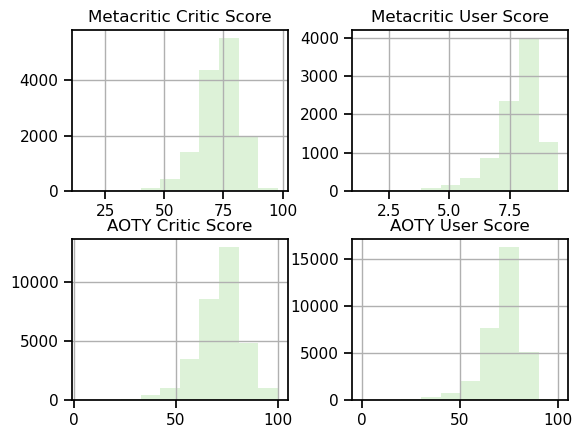

In [4]:
total_set[score_cols].hist()

<Axes: xlabel='AOTY Critic Score', ylabel='AOTY User Score'>

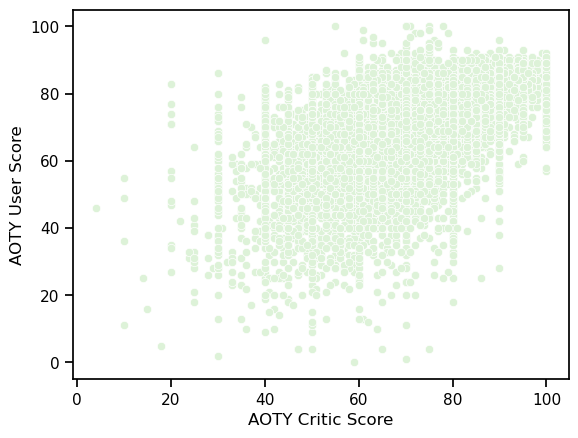

In [5]:
sns.scatterplot(data=total_set, x='AOTY Critic Score', y='AOTY User Score')

In [17]:
# Only this one was on a 10-point scale, but fortunately it goes to one decimal point,
# so just multiplying by 10 should be enough to make all score columns comparable.

total_set['Metacritic User Score'] = total_set['Metacritic User Score'] * 10

<Axes: >

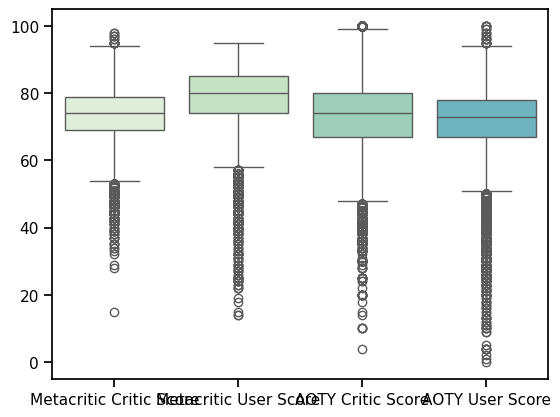

In [25]:
sns.boxplot(total_set[score_cols])

<Axes: >

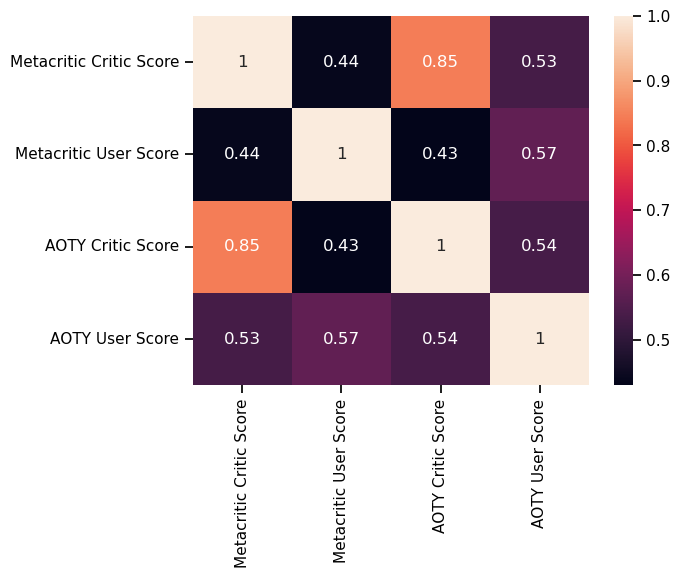

In [23]:
corrs = total_set[score_cols].corr()

sns.heatmap(corrs, annot=True)

We see that scores are positively correlated across the board, but critic scores correlate better with each other than with user scores.

This does suggest that they may have different biases. Hooray for exploration!

Since there are a lot of nulls in the Metacritic columns, let's simplify our exploration and focus only on AOTY for now.

In [90]:
scores = [col for col in score_cols if 'AOTY' in col]
critics = 'AOTY Critic Score'
users = 'AOTY User Score'


In [105]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32358 entries, 0 to 32357
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Artist                   32358 non-null  object 
 1   Title                    32357 non-null  object 
 2   Release Month            31769 non-null  object 
 3   Release Day              31768 non-null  object 
 4   Release Year             32358 non-null  int64  
 5   Format                   32358 non-null  object 
 6   Label                    28902 non-null  object 
 7   Genre                    24398 non-null  object 
 8   Metacritic Critic Score  13884 non-null  float64
 9   Metacritic Reviews       13884 non-null  float64
 10  Metacritic User Score    9099 non-null   float64
 11  Metacritic User Reviews  10574 non-null  float64
 12  AOTY Critic Score        32358 non-null  int64  
 13  AOTY Critic Reviews      32358 non-null  int64  
 14  AOTY User Score       

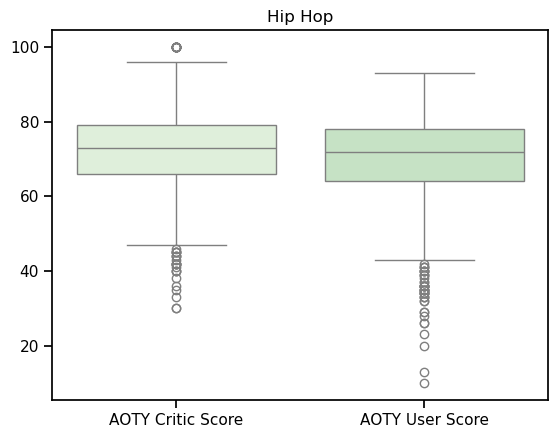

Mean critic score: 72.03267211201867
Mean user score: 69.5565927654609
P-value: 2.1380713414422747e-11


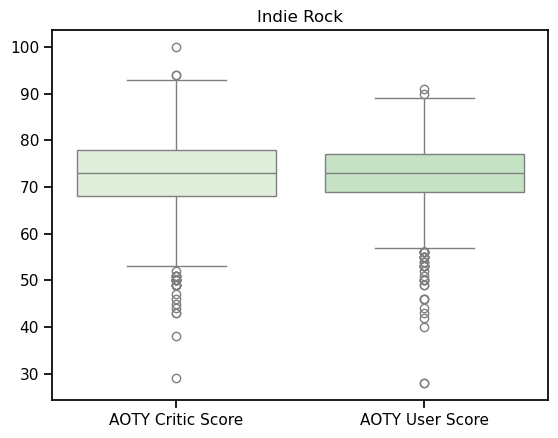

Mean critic score: 72.41814837522992
Mean user score: 72.76824034334764
P-value: 0.18066054477798313


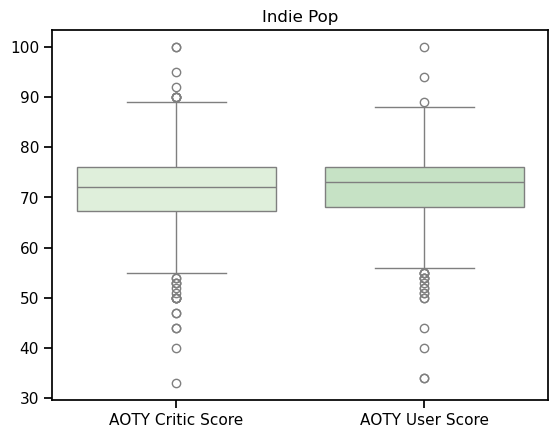

Mean critic score: 71.38649706457926
Mean user score: 72.0078277886497
P-value: 0.04173361311883884


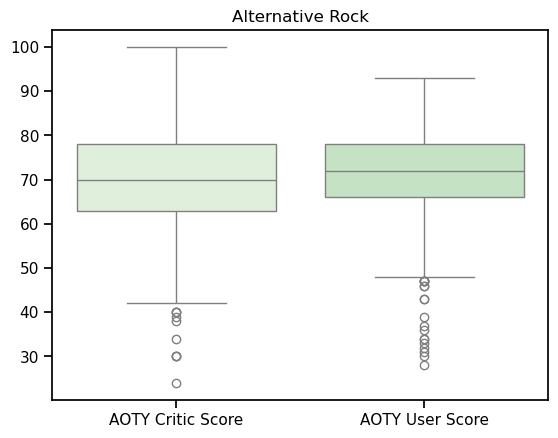

Mean critic score: 70.06706114398422
Mean user score: 71.1094674556213
P-value: 0.0232185899999691


In [112]:
v_freq_genre_df = total_set[total_set['Genre'].isin(v_frequent_genre_cols)]


for genre in v_frequent_genre_cols :
    current_df = total_set[total_set['Genre']==genre]
    sns.boxplot(current_df[scores])
    plt.title(genre)
    plt.show()

    critic_scores = current_df[critics].values
    critic_mean = critic_scores.mean()
    
    user_scores = current_df[users].values
    user_mean = user_scores.mean()

    t_stat, p_value = ttest_ind(critic_scores, user_scores, equal_var=False)
    print(f'Mean critic score: {critic_mean}')
    print(f'Mean user score: {user_mean}')
    print(f'P-value: {p_value}')

All of these P-values indicate that there is measurable difference between critic and user score means, and that this difference varies across genre.

For example, users are generally harder on Hip Hop than critics, while they're more forgiving of Alt Rock than critics.

In [33]:
genre_counts = total_set['Genre'].value_counts()

In [41]:
frequent_genres = genre_counts[genre_counts > 100]
frequent_genre_cols = list(frequent_genres.index)
frequent_genre_cols

['Hip Hop',
 'Indie Rock',
 'Indie Pop',
 'Alternative Rock',
 'Singer-Songwriter',
 'Pop Rock',
 'Electronic',
 'Art Pop',
 'Folk',
 'Synthpop',
 'Post-Punk',
 'Pop',
 'R&B',
 'Hard Rock',
 'Psychedelic Rock',
 'Electropop',
 'Ambient',
 'Indie Folk',
 'Country',
 'Dream Pop',
 'Jazz',
 'Rock',
 'Soul',
 'Post-Rock',
 'Trap Rap',
 'Alternative R&B',
 'Death Metal',
 'Progressive Rock',
 'Post-Hardcore',
 'Neo-Psychedelia',
 'Garage Rock',
 'Noise Rock',
 'Punk Rock',
 'Progressive Metal',
 'Alt-Country',
 'Experimental',
 'Pop Punk',
 'Heavy Metal',
 'Experimental Rock',
 'Shoegaze',
 'Folk Rock',
 'IDM',
 'Indietronica',
 'Dance Pop',
 'Black Metal',
 'Alternative Metal',
 'Metalcore',
 'Americana',
 'Power Pop',
 'Blues Rock',
 'Thrash Metal',
 'New Wave',
 'Pop Rap',
 'Art Rock',
 'Neo-Soul',
 'Chamber Pop',
 'Psychedelic Pop',
 'Hardcore Punk',
 'Sludge Metal']

In [83]:
v_frequent_genres = genre_counts[genre_counts > 1000]
v_frequent_genre_cols = list(v_frequent_genres.index)
v_frequent_genre_cols

['Hip Hop', 'Indie Rock', 'Indie Pop', 'Alternative Rock']

In [49]:
total_set['Genre'].value_counts().index[0]

'Hip Hop'

In [51]:
total_set[total_set['Genre']==v_frequent_genre_cols[0]]

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
45,N.A.S.A.,The Spirit of Apollo,February,17,2009,LP,Anti-,Hip Hop,64.0,24.0,51.0,20.0,64,17,65,6
51,Brother Ali,The Truth Is Here,March,10,2009,EP,Rhymesayers Entertainment / Warner Music Grou,Hip Hop,86.0,6.0,88.0,10.0,81,3,78,15
60,DOOM,Born Like This,March,24,2009,LP,Lex,Hip Hop,77.0,21.0,87.0,24.0,74,17,81,312
68,Eminem,Relapse,May,19,2009,LP,"Aftermath, Interscope, Shady",Hip Hop,59.0,27.0,82.0,995.0,55,23,61,628
80,Asher Roth,Asleep in the Bread Aisle,April,21,2009,LP,SchoolBoy/SRC/Universal Motown,Hip Hop,56.0,20.0,70.0,28.0,50,14,40,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31544,Master P,Ghetto Postage,November,28,2000,LP,No Limit,Hip Hop,57.0,6.0,85.0,6.0,55,4,34,2
31546,Silkk The Shocker,"My World, My Way",February,27,2001,LP,No Limit,Hip Hop,63.0,6.0,NaN,6.0,54,2,52,1
31726,Freeway,Free Will,April,29,2016,LP,Babygrande,Hip Hop,77.0,4.0,NaN,NaN,72,4,57,3
31944,Inspectah Deck,Manifesto,March,23,2010,LP,NaN,Hip Hop,62.0,4.0,NaN,NaN,53,4,49,4


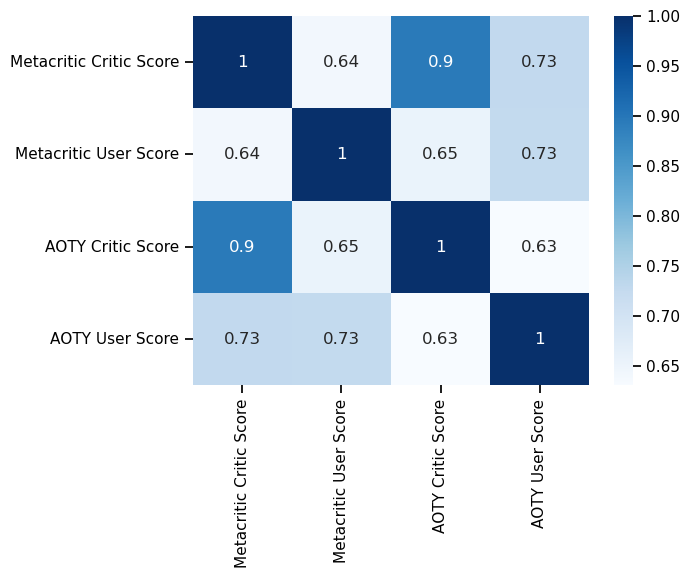

Change over time?
---

Let's see if AOTY critic scores have changed over time.

C:\Users\Josh\AppData\Local\Temp\ipykernel_13092\2100784146.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = total_set.groupby('Release Year').mean()


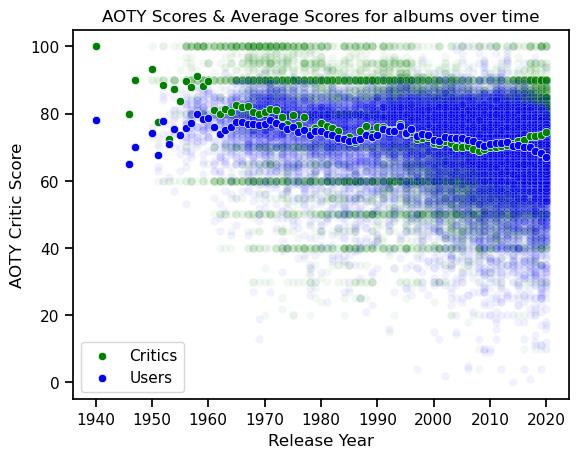

In [179]:
sns.scatterplot(data=total_set, x='Release Year', y=critics, color="Green", alpha=0.05)
sns.scatterplot(data=total_set, x='Release Year', y=users, color="Blue", alpha=0.05)

plt.title('AOTY Scores & Average Scores for albums over time')


mean_df = total_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y=critics, color='Green', label='Critics')

sns.scatterplot(data=mean_df, x='Release Year', y=users, color='Blue', label='Users')

plt.legend()
plt.show()

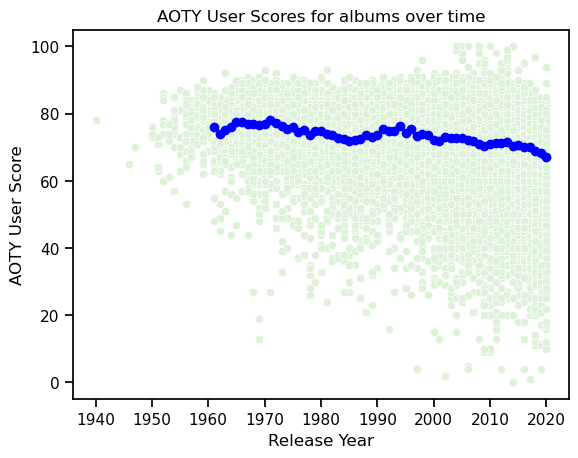

In [159]:
sns.scatterplot(data=total_set, x='Release Year', y=users)

plt.title('AOTY User Scores for albums over time')

starting_year = total_set['Release Year'].min()

for year in range(1961, 2021) :
    yearly_mean = total_set[total_set['Release Year']==year][users].mean()
    plt.scatter(year, yearly_mean, color='Blue')
plt.show()

<Axes: >

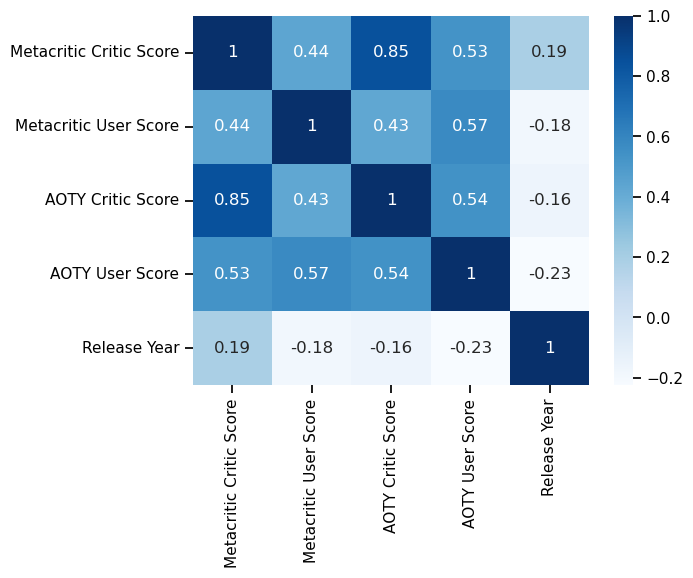

In [119]:
considered_cols = score_cols.copy()
considered_cols.append('Release Year')

year_corrs = total_set[considered_cols].corr()
sns.heatmap(year_corrs, cmap='Blues', annot=True)

It does seem that there's a slight but slight inverse correlation.

Let's see if genre affects this. To get any meaningful insight, we'll have to only look at the common genres.

In [141]:
v_frequent_genres = genre_counts[genre_counts > 500]
v_frequent_genre_cols = list(v_frequent_genres.index)

v_frequent_genre_df = total_set[total_set['Genre'].isin(v_frequent_genre_cols)]

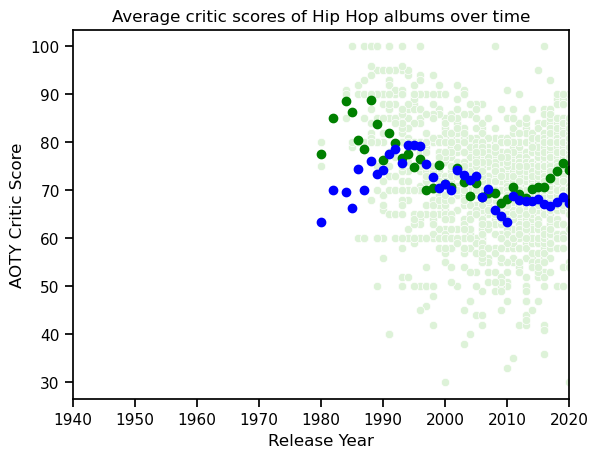

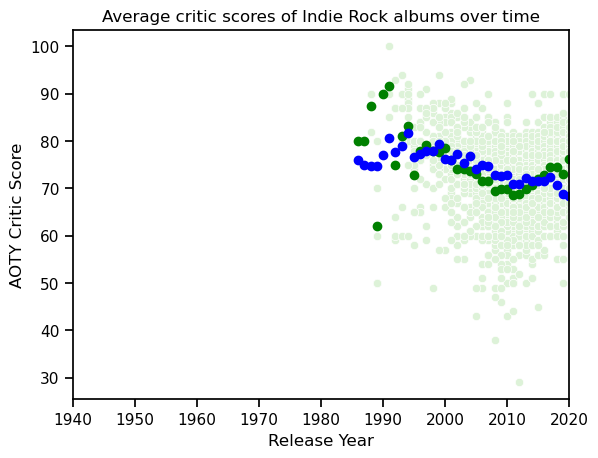

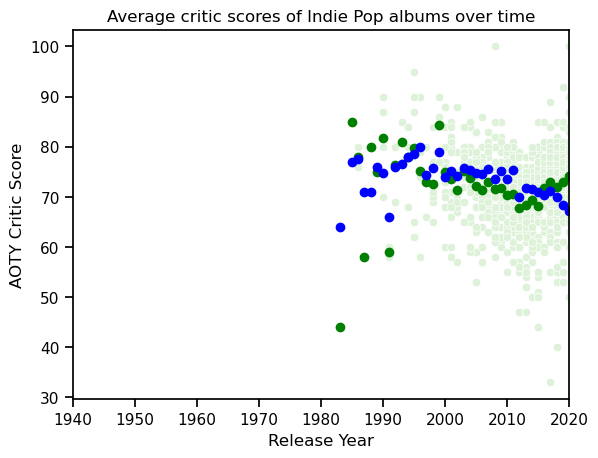

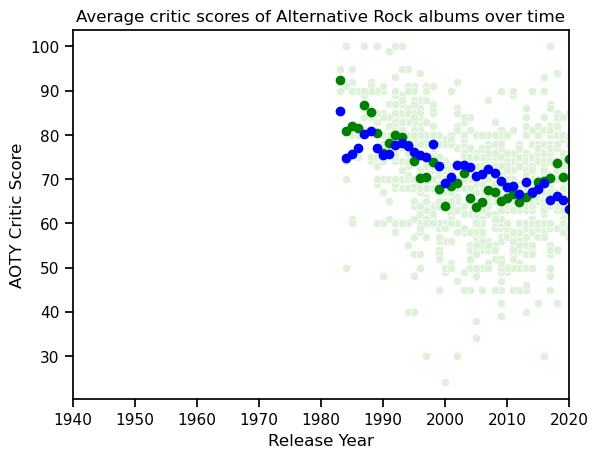

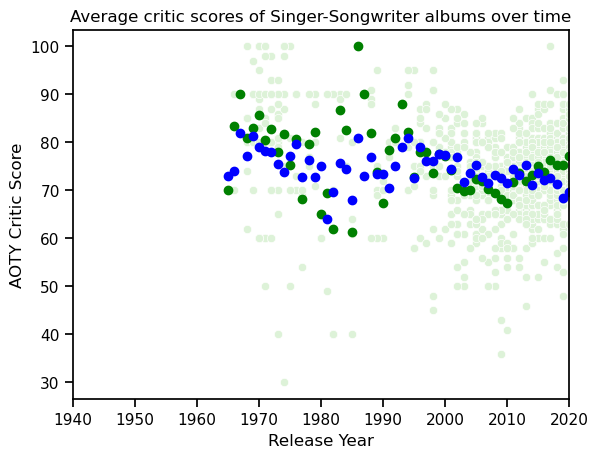

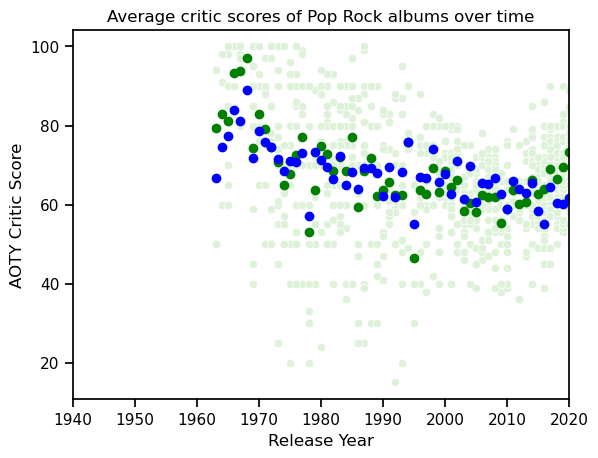

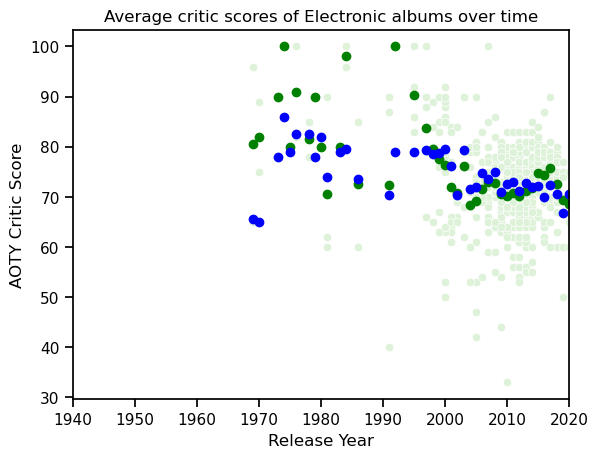

In [161]:
for genre in v_frequent_genre_cols :
    current_df = total_set[total_set['Genre']==genre]
    sns.scatterplot(data=current_df, x='Release Year', y=critics)
    plt.title(f'Average critic scores of {genre} albums over time')
    plt.xlim(1940, 2020)

    starting_year = current_df['Release Year'].min()

    for year in range(starting_year, 2021) :
        yearly_mean = current_df[current_df['Release Year']==year][critics].mean()
        plt.scatter(year, yearly_mean, color='Green')

    for year in range(starting_year, 2021) :
        yearly_mean = current_df[current_df['Release Year']==year][users].mean()
        plt.scatter(year, yearly_mean, color='Blue')

    plt.show()

Certainly seems like as new genres enter the market, EVERY genre's scores go down!!! But after a while, they rebound.